In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, metrics
from sklearn.neighbors import KNeighborsClassifier

d:\programfiles\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# label

In [2]:
fault_label = {
    '0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', '6':'driver', 
    '7':'system', '8':'application', '9':'io', '10':'others', '11':'security', '12':'disk', '13':'processor'}

# load dataset

In [3]:
X = []
y = []

print("loading data...")
try:
    with open("data_msg_type/type_count.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/label_index.txt", 'rU') as f:
        res = list(f)
        for line in res:
            y.append(int(line.strip("\n")[0]))
            
except:
    print("Error in reading the train set file.")
    exit()

print("Dataset loaded.")

loading data...


d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  
d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 'U' mode is deprecated


Dataset loaded.


# split dataset

In [4]:
X = np.array(X) #change to matrix
y = np.array(y) #change to matrix (sklearn models only accept matrices)

print("Separating data into 67% training set & 33% test set...")
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.33, random_state=33) # add random state here...
print("Dataset separated.\n")

Separating data into 67% training set & 33% test set...
Dataset separated.



# knn train

In [ ]:
print("---------------K Nearest Neighbors----------------")
n_neighbors_list = range(1, 2, 1)
result_n_neighbors = []
max_score_knn = float("-inf")
best_param_knn = None

for n_neighbors in n_neighbors_list:
    print("Testing %d nearest neighbors" % n_neighbors)
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_validation.cross_val_score(
             knn_clf, X_train, y_train, scoring="accuracy", cv=14)
    result_n_neighbors.append(scores.mean())
    if scores.mean() > max_score_knn:
        max_score_knn = scores.mean()
        best_param_knn = {"n_neighbors": n_neighbors}

---------------K Nearest Neighbors----------------
Testing 1 nearest neighbors


# test and evaluation

In [9]:
knn_clf = KNeighborsClassifier(best_param_knn.get("n_neighbors")).fit(X_train, y_train)
knn_clf_test_score = knn_clf.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_val)):
    count2 += 1
    classinrow = X_val[i]
    classinrow = np.array(X_val[i]).reshape(1,-1)
    predicted = knn_clf.predict(classinrow)
    actual = y_val[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Number of neighbors: ", len(n_neighbors_list))
print("Train Results: ", result_n_neighbors)
print("Best accuracy: ", max_score_knn)
print("Best parameter: ", best_param_knn)
print("Test set accuracy: ", knn_clf_test_score)

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)

Number of neighbors:  1
Train Results:  [0.95072952735611083]
Best accuracy:  0.950729527356
Best parameter:  {'n_neighbors': 1}
Test set accuracy:  0.954331279449
Total cases:  1671
Correct Prediction:  1600
Correct prediction rate:  0.9575104727707959


# plot

d:\programfiles\python35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

     notice       0.97      0.95      0.96       694
       info       0.89      0.93      0.91       108
    warning       0.77      0.91      0.84        93
      error       0.77      0.79      0.78        42
   Critical       1.00      0.99      0.99       729
      alert       1.00      1.00      1.00         2
  emergency       0.00      0.00      0.00         3

avg / total       0.96      0.96      0.96      1671

[[658   8  20   6   2   0   0]
 [  6 100   0   2   0   0   0]
 [  5   1  85   2   0   0   0]
 [  4   1   4  33   0   0   0]
 [  6   0   1   0 722   0   0]
 [  0   0   0   0   0   2   0]
 [  1   2   0   0   0   0   0]]


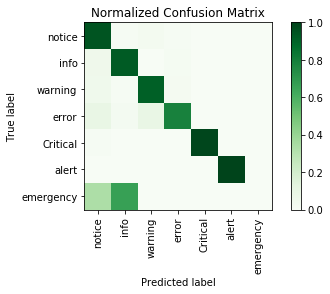

In [10]:
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(actualist, predlist,
      target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

# visualization
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)